In [167]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg
from wordcloud import WordCloud

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [169]:
df = pd.read_csv('Connections.csv', skiprows = 3)
df['Connected Year'] = pd.to_datetime(df['Connected On']).dt.year
df['Connected Month'] = pd.to_datetime(df['Connected On']).dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228 entries, 0 to 4227
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   First Name       4159 non-null   object
 1   Last Name        4159 non-null   object
 2   URL              4159 non-null   object
 3   Email Address    59 non-null     object
 4   Company          4098 non-null   object
 5   Position         4099 non-null   object
 6   Connected On     4228 non-null   object
 7   Connected Year   4228 non-null   int32 
 8   Connected Month  4228 non-null   int32 
dtypes: int32(2), object(7)
memory usage: 264.4+ KB


Interactive data exploration with pygwalker library

In [170]:
pyg.walk(df)

Box(children=(HTML(value='\n<div id="ifr-pyg-0006213f3d3bd801UqC3oFrSkJGebp9l" style="height: auto">\n    <hea…

### Top 15 Job titles of connections made in 2016-2018, 2024, and across all years

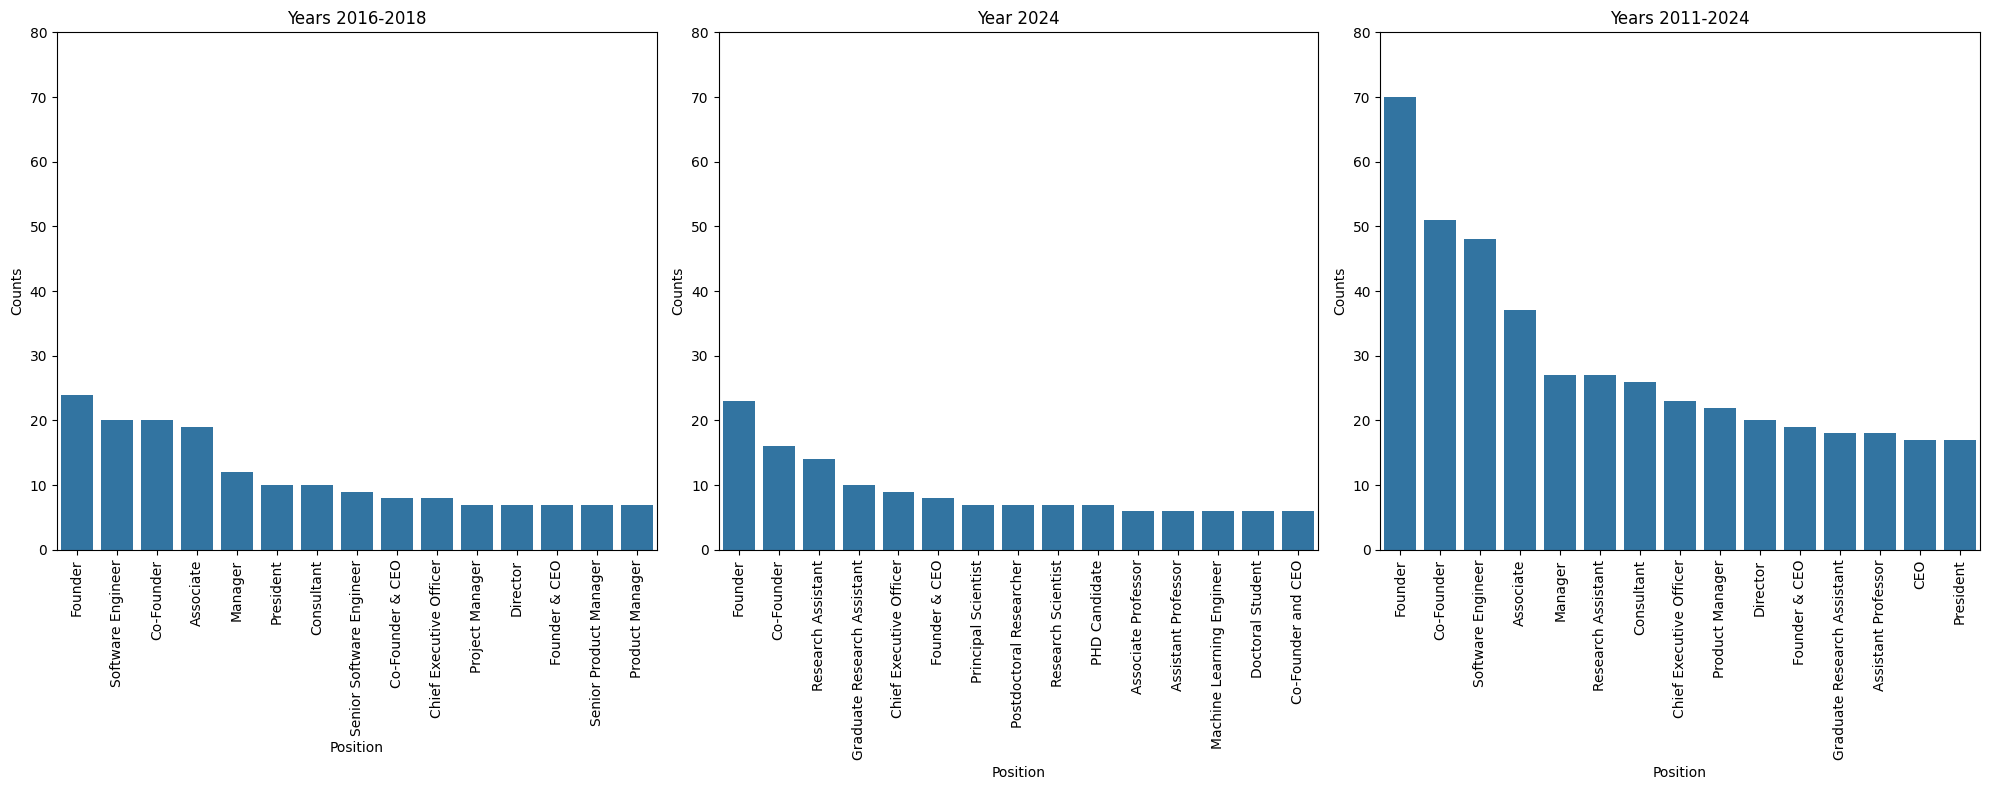

In [171]:
# Filter and get the top 15 positions for each plot
transition1 = df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Position'].value_counts().head(15)
transition2 = df.loc[df['Connected Year'].isin([2023, 2024])]['Position'].value_counts().head(15)
all_years = df['Position'].value_counts().head(15)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1
sns.barplot(x=transition1.index, y=transition1.values, ax=axs[0])
axs[0].set_title('Years 2016-2018')
axs[0].set_xlabel('Position')
axs[0].set_ylabel('Counts')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim([0, 80])
# Plot 2
sns.barplot(x=transition2.index, y=transition2.values, ax=axs[1])
axs[1].set_title('Year 2024')
axs[1].set_xlabel('Position')
axs[1].set_ylabel('Counts')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim([0, 80])
# Plot 3
sns.barplot(x=all_years.index, y=all_years.values, ax=axs[2])
axs[2].set_title('Years 2011-2024')
axs[2].set_xlabel('Position')
axs[2].set_ylabel('Counts')
axs[2].tick_params(axis='x', rotation=90)
axs[2].set_ylim([0, 80])

plt.tight_layout()
plt.show()

### Top 15 Companies connected with across Years 2016-2018, 2024, and across all years

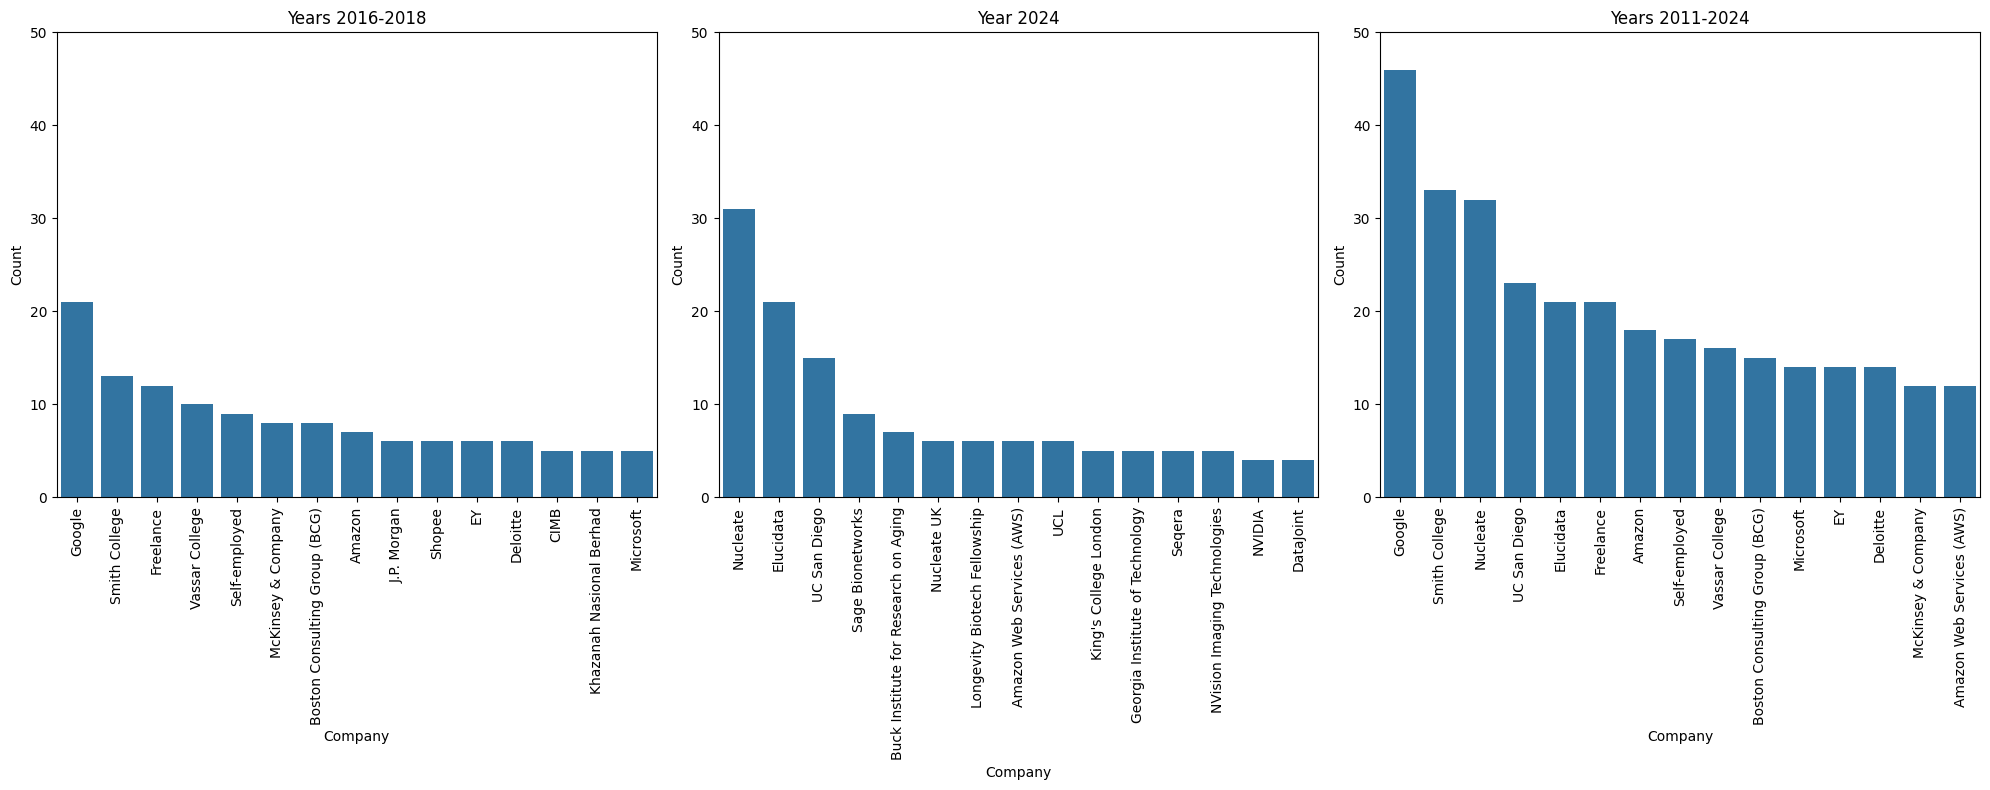

In [172]:
# Filter and get the top 15 positions for each plot
transition1 = df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Company'].value_counts().head(15)
transition2 = df.loc[df['Connected Year'].isin([2023, 2024])]['Company'].value_counts().head(15)
all_years = df['Company'].value_counts().head(15)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1
sns.barplot(x=transition1.index, y=transition1.values, ax=axs[0])
axs[0].set_title('Years 2016-2018')
axs[0].set_xlabel('Company')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)
axs[0].set_ylim([0, 50])

# Plot 2
sns.barplot(x=transition2.index, y=transition2.values, ax=axs[1])
axs[1].set_title('Year 2024')
axs[1].set_xlabel('Company')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)
axs[1].set_ylim([0, 50])

# Plot 3
sns.barplot(x=all_years.index, y=all_years.values, ax=axs[2])
axs[2].set_title('Years 2011-2024')
axs[2].set_xlabel('Company')
axs[2].set_ylabel('Count')
axs[2].tick_params(axis='x', rotation=90)
axs[2].set_ylim([0, 50])

plt.tight_layout()
plt.show()

### Historical Overlap of Top 20 Companies: 2016-2018 and 2024 vs. All-Time Patterns








In [173]:
companies_2016_2018 = set(df.loc[df['Connected Year'].isin([2016, 2017, 2018])]['Company'].value_counts().head(20).index)
companies_2024 = set(df.loc[df['Connected Year'].isin([2023, 2024])]['Company'].value_counts().head(20).index)
all_companies = set(df['Company'].value_counts().head(20).index)

# Find overlapping companies between 2024 and all years
all_years_overlap_with_2024 = all_companies.intersection(companies_2024)
print("Top companies represented in both 2024 and across all years", all_years_overlap_with_2024)

# Find overlapping companies between 2016-2018 and all years
all_years_overlap_with_20161718 = all_companies.intersection(companies_2016_2018)
print("Top companies represented in 2016-2018 and across all years", all_years_overlap_with_20161718)

# Find companies in 2016-2018 but not in all years
unique_2016_2018 = companies_2016_2018.difference(all_companies)
print("Top companies represented only in 2016-2018, but not across all years", unique_2016_2018)

# Find companies in 2024 but not all years
unique_2024 = companies_2024.difference(all_companies)
print("Top companies represented in 2024 but not across all years", unique_2024)

Top companies represented in both 2024 and across all years {'Nucleate', 'Elucidata', 'UC San Diego', 'Amazon Web Services (AWS)', 'Sage Bionetworks', 'Longevity Biotech Fellowship'}
Top companies represented in 2016-2018 and across all years {'Google', 'Amazon', 'Freelance', 'EY', 'Boston Consulting Group (BCG)', 'Microsoft', 'McKinsey & Company', 'Vassar College', 'Smith College', 'Deloitte', 'Self-employed'}
Top companies represented only in 2016-2018, but not across all years {'Citi', 'Asia School of Business', 'CIMB', 'Goldman Sachs', 'Shopee', 'Grab', 'Bain & Company', 'J.P. Morgan', 'Khazanah Nasional Berhad'}
Top companies represented in 2024 but not across all years {'NVIDIA', "King's College London", 'Georgia Institute of Technology', 'National University of Singapore', 'Buck Institute for Research on Aging', 'DataJoint', 'Sama Therapeutics', 'Broad Institute of MIT and Harvard', 'The Alan Turing Institute', 'UCL', 'Seqera', 'University of Oklahoma Health Sciences Center', 'N

### Number of connections all-time - count and percentage

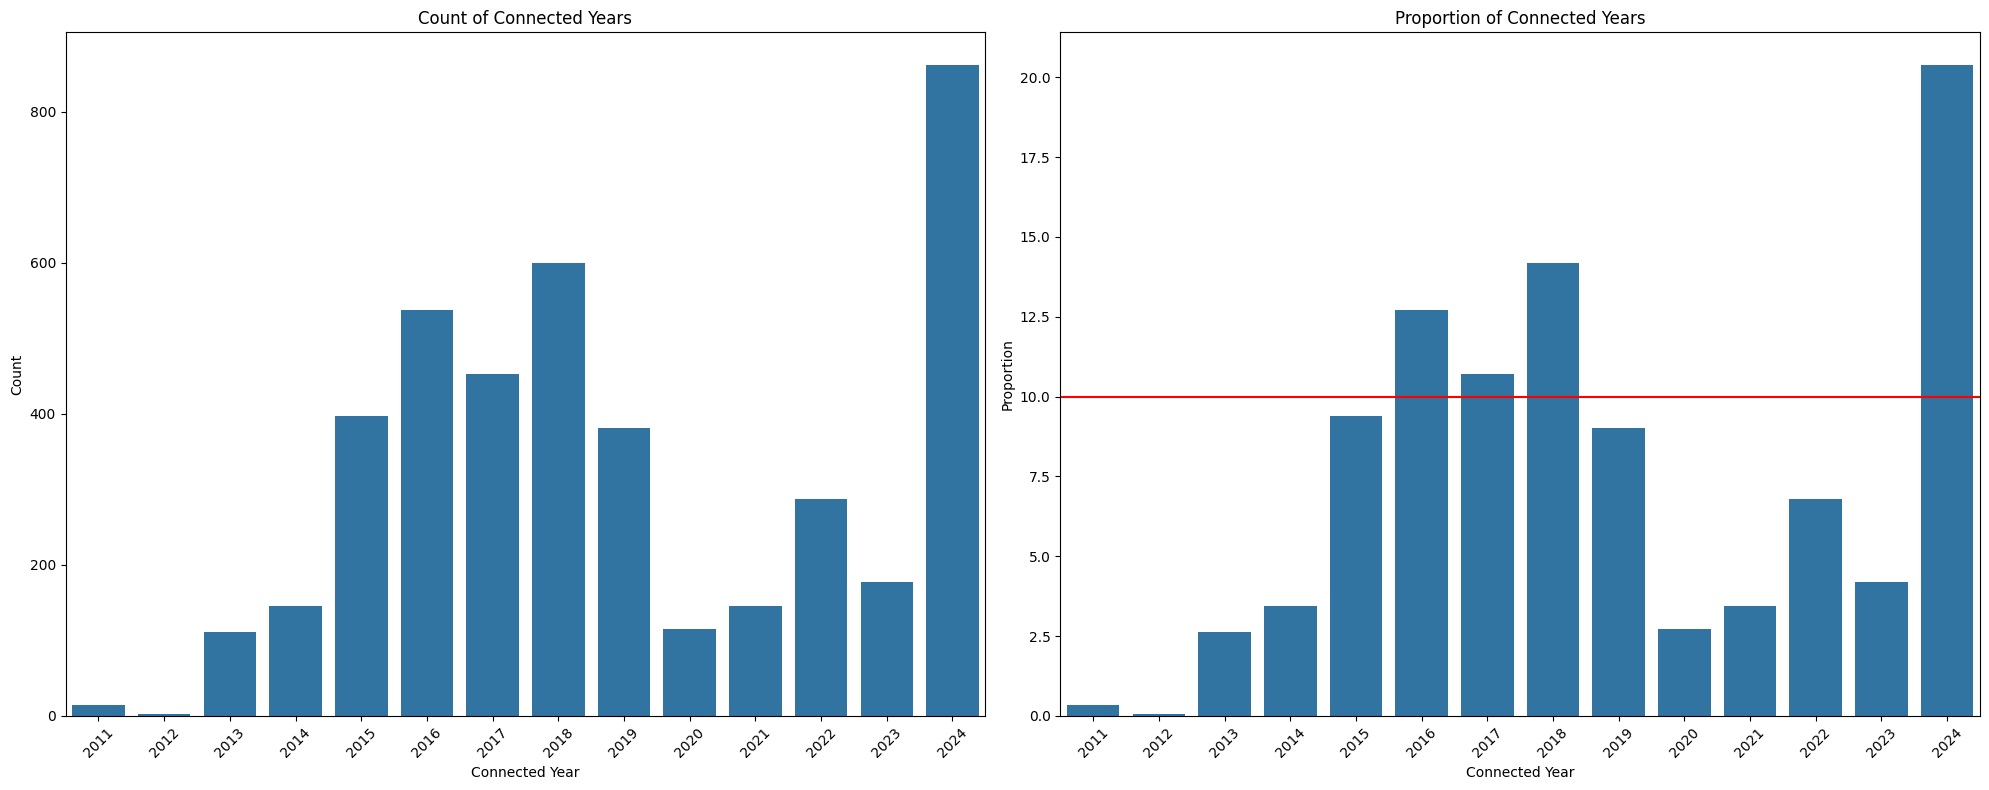

In [174]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Count of 'Connected Year'
sns.countplot(x=df['Connected Year'], ax=axs[0])
axs[0].set_title('Count of Connected Years')
axs[0].set_xlabel('Connected Year')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plot 2: Proportion of 'Connected Year'
sns.barplot(x=df['Connected Year'].value_counts().index, 
            y=df['Connected Year'].value_counts().values / df['Connected Year'].value_counts().sum()*100, ax=axs[1])
axs[1].set_title('Proportion of Connected Years')
axs[1].set_xlabel('Connected Year')
axs[1].set_ylabel('Proportion')
axs[1].tick_params(axis='x', rotation=45)
plt.axhline(y = 10, color = 'r', linestyle = '-') 

plt.tight_layout()
plt.show()


### Number of Connections made by month across Years 2017, 2018 and Year 2024 

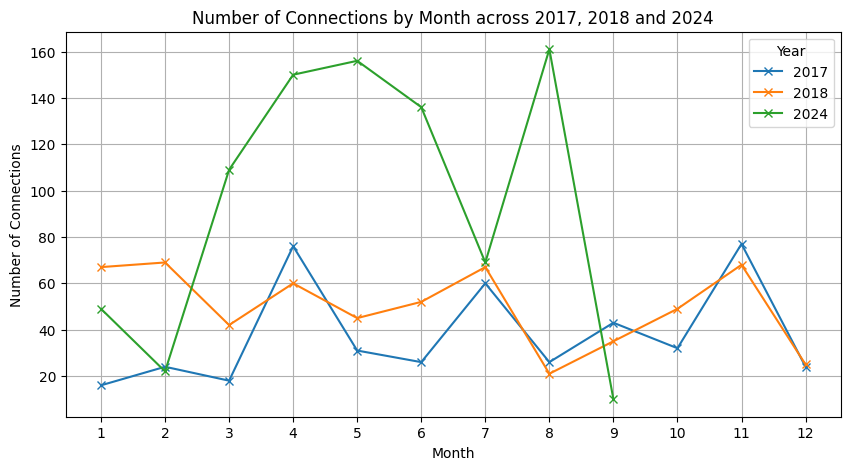

In [175]:
df['Connected Month'] =  pd.to_datetime(df['Connected On']).dt.month
# Plotting
plt.figure(figsize=(10, 5))

for year in [2017, 2018, 2024]:
    yearly_data = df[df['Connected Year'] == year]
    month_counts = yearly_data['Connected Month'].value_counts().sort_index()  # Ensure months are sorted
    plt.plot(month_counts.index, month_counts.values, marker='x', label=str(year))

plt.title('Number of Connections by Month across 2017, 2018 and 2024')
plt.xlabel('Month')
plt.ylabel('Number of Connections')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months 1-12
plt.legend(title='Year')
plt.grid(True)
plt.show()

### Word Cloud of Job Title of Connections

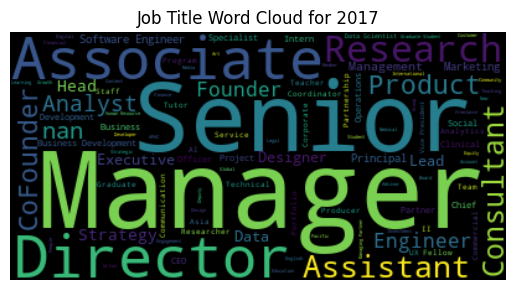

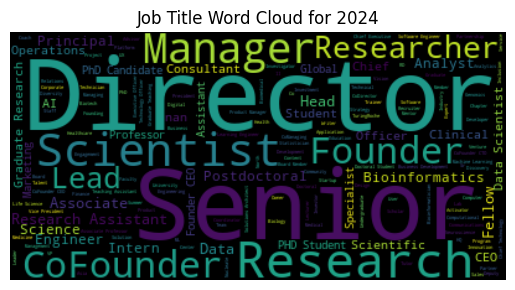

In [176]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for year in [2017, 2024]:
    # Filter the DataFrame for the current year in the loop
    yearly_data = df[df['Connected Year'] == year]
    
    # Assuming 'Position' is the column containing the text data
    text = " ".join(yearly_data['Position'].astype(str))
    
    # Remove all numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    
    # Create and generate a word cloud image
    wordcloud = WordCloud().generate(text)
    
    # Display the generated image with the year as the title
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Job Title Word Cloud for {year}")
    plt.axis("off")  # Turn off the axis
    plt.show()  # Display the word cloud image


### Job title of connections made in July and August 2024

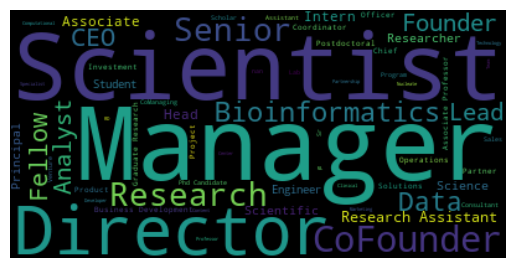

In [177]:
# get data for the year 2024 and month 8
yearly_data = df[(df['Connected Year'] == 2024) & (df['Connected Month'].isin([7, 8]))]

text = " ".join(yearly_data['Position'].astype(str))

# Remove all numbers and punctuation
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
text = re.sub(r'\d+', '', text)      # Remove numbers

# Create and generate a word cloud image
wordcloud = WordCloud().generate(text)

fig = plt.gcf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Turn off the axis
plt.show()  # Display the word cloud image
#fig.savefig('wc_august2024.pdf')

## Word clustering using NLTK library vs. a pre-trained BEERT model

#### NLTK
- Convert the text into a sparse matrix of token counts using weighted token counts
- Create fixed size vocab based on corpus
- Each document is represented as a vector of size equal to the vocab
- Each word is treated independently of others, features are based on frequency of terms
- Used for document classification, key word extraction
- Might be less accurate

In [178]:
vectorizer = TfidfVectorizer() # matrix of TF-IDF features.
nltk.download('stopwords')

df.loc[:, 'Position'] = df['Position'].fillna('')

def preprocess_text(text):
    text =  re.sub(r'\d+', '', text)   # replace digits with empty sr
    text = re.sub(r'[^\w\s]', ' ', text).lower() # replace punctuation with space and lowercase all text
    stop_words = set(stopwords.words('english')) # remove stop wrods
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_job_titles'] = df['Position'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [179]:
# Fit and transform the cleaned job titles
X = vectorizer.fit_transform(df['cleaned_job_titles']) 

# Determine the optimal number of clusters using the silhouette score
range_n_clusters = list(range(2, 10))
best_n_clusters = 2
best_silhouette_score = -1

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    if silhouette_avg > best_silhouette_score:
        best_n_clusters = n_clusters
        best_silhouette_score = silhouette_avg

# Fit the best KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
print(best_n_clusters)

8


In [187]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Job Title Clusters using NLTK')
# Add legend to show cluster labels

# Calculate and plot cluster centroids
unique_clusters = np.unique(df['cluster'])
for cluster in unique_clusters:
    # Get all points in the current cluster
    points_in_cluster = X_reduced[df['cluster'] == cluster]
    # Calculate the centroid
    centroid = points_in_cluster.mean(axis=0)
    # Annotate the cluster number at the centroid
    plt.text(centroid[0], centroid[1], str(cluster), fontsize=15, fontweight='bold', ha='center', va='center')

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

cluster
4    737
1    704
5    605
2    560
7    439
0    424
6    407
3    352
Name: count, dtype: int64


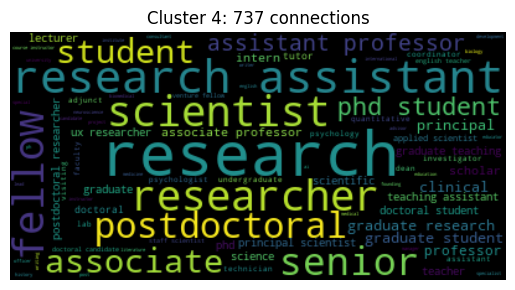

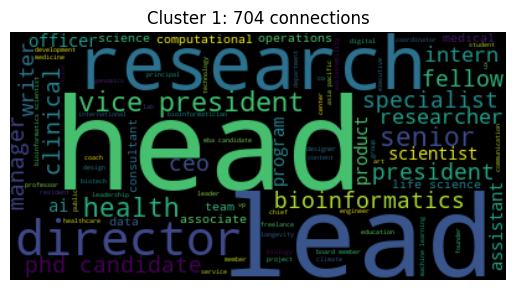

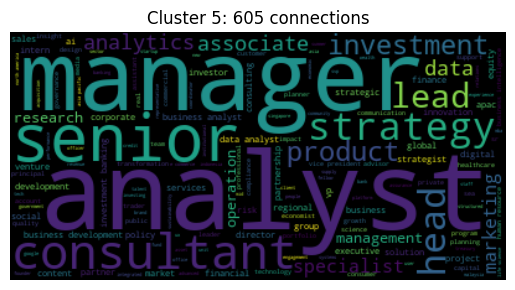

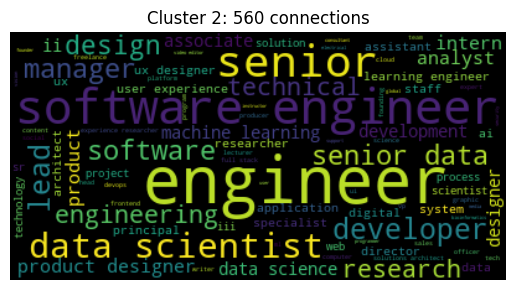

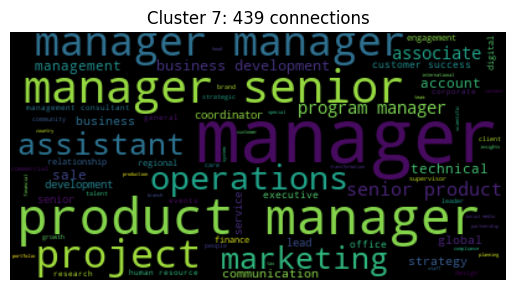

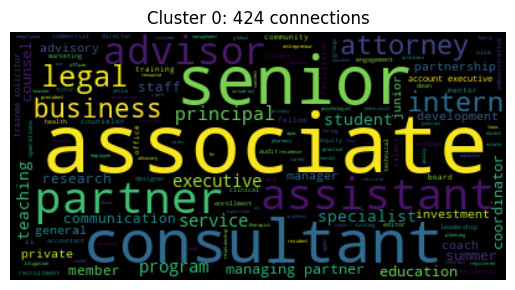

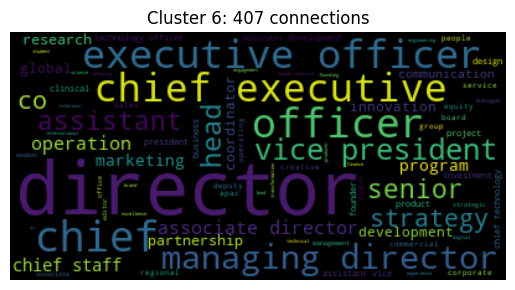

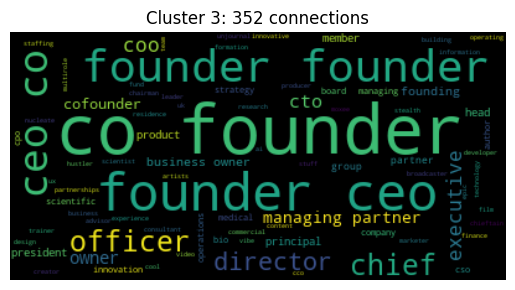

In [191]:
cluster_count = df['cluster'].value_counts()
print(cluster_count)
for c in cluster_count.index:
    # Filter the DataFrame for the current year in the loop
    temp = df[df['cluster'] == c]
    
    # Assuming 'Position' is the column containing the text data
    text = " ".join(temp['cleaned_job_titles'].astype(str))
    
    # Remove all numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    
    # Create and generate a word cloud image
    wordcloud = WordCloud().generate(text)
    count = cluster_count[c]
    # Display the generated image with the year as the title
    fig = plt.gcf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {c}: {count} connections")
    plt.axis("off")  # Turn off the axis
    #plt.show()  # Display the word cloud image
    plt.savefig(f'nltk_clusters_{c}.png')
    plt.show()  # Display the word cloud image

#### Pre-trained BERT 
- Feature vectors capture information from high dimensions
- Can leverage contextual understanding

In [182]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-distilroberta-base-v2')
# https://huggingface.co/sentence-transformers/paraphrase-distilroberta-base-v2
# https://medium.com/@abhishekranjandev/building-a-semantic-search-engine-with-machine-learning-and-jupyter-notebooks-fbcb15b538c5

X = model.encode(df['cleaned_job_titles'].tolist()) # pre-trained Sentence-BERT model to generate document embeddings

kmeans = KMeans(n_clusters=best_n_clusters, random_state=42) # number of clusters determined above = 8
df['cluster'] = kmeans.fit_predict(X)


C:\Users\LENOVO\miniconda3\envs\linkedin\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


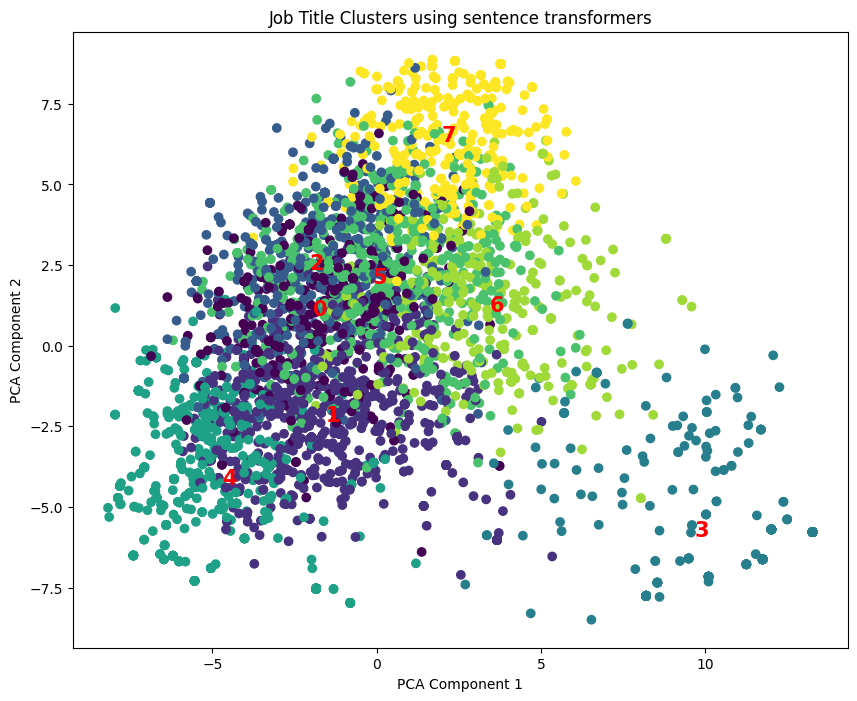

In [186]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Job Title Clusters using sentence transformers')
# Add legend to show cluster labels
# Calculate and plot cluster centroids
unique_clusters = np.unique(df['cluster'])
for cluster in unique_clusters:
    # Get all points in the current cluster
    points_in_cluster = X_reduced[df['cluster'] == cluster]
    # Calculate the centroid
    centroid = points_in_cluster.mean(axis=0)
    # Annotate the cluster number at the centroid
    plt.text(centroid[0], centroid[1], str(cluster), fontsize=15, fontweight='bold', ha='center', va='center', color='red')

plt.show()

In [184]:
cluster_count = df['cluster'].value_counts()
cluster_count

cluster
4    737
1    704
5    605
2    560
7    439
0    424
6    407
3    352
Name: count, dtype: int64

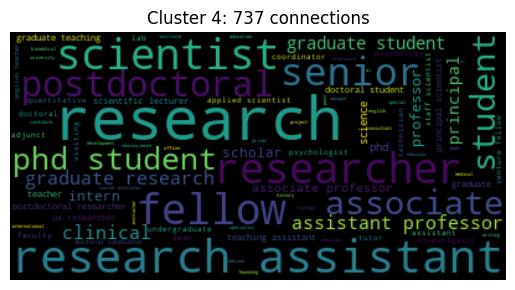

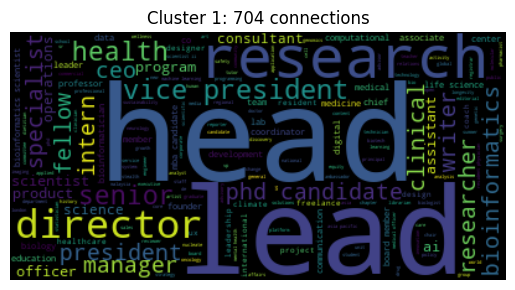

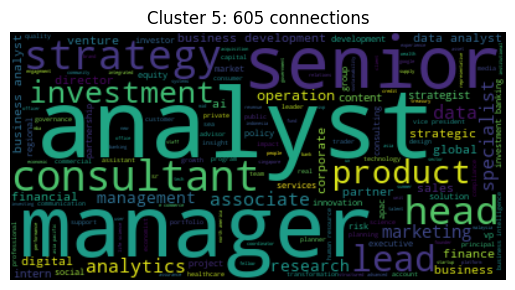

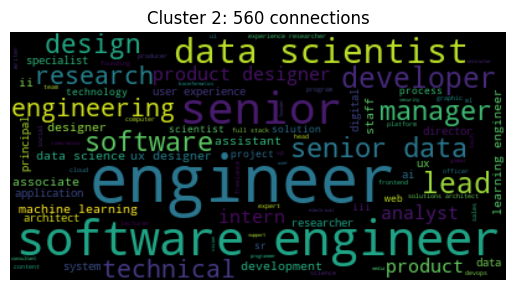

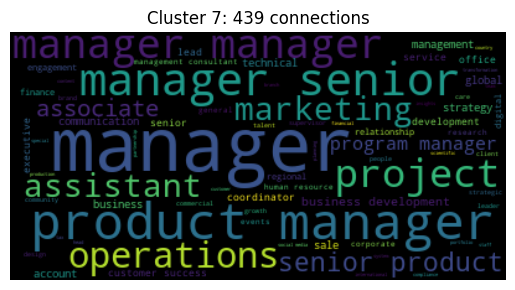

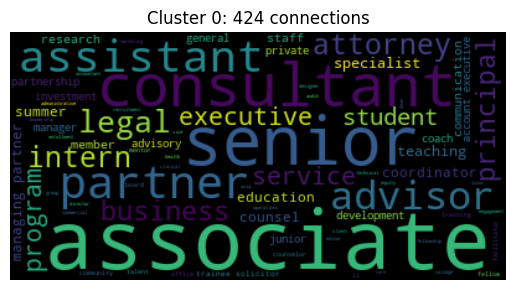

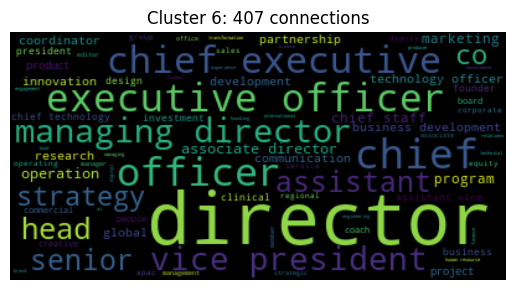

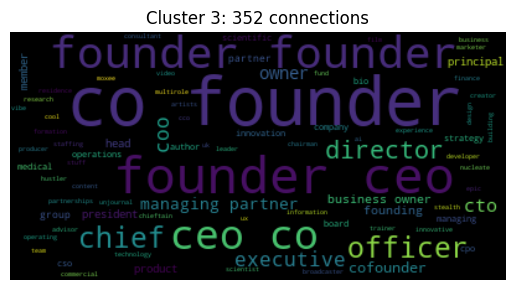

In [190]:
cluster_count = df['cluster'].value_counts()
for c in cluster_count.index:
    # Filter the DataFrame for the current year in the loop
    temp = df[df['cluster'] == c]
    
    # Assuming 'Position' is the column containing the text data
    text = " ".join(temp['cleaned_job_titles'].astype(str))
    
    # Remove all numbers and punctuation
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    
    # Create and generate a word cloud image
    wordcloud = WordCloud().generate(text)
    count = cluster_count[c]
    # Display the generated image with the year as the title
    fig = plt.gcf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {c}: {count} connections")
    plt.axis("off")  # Turn off the axis
    plt.savefig(f'bert_clusters_{c}.png')
    plt.show()  # Display the word cloud image
    